In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('SA_AAL_estPropA.csv')
#df = df.drop(df.columns[0], axis = 'columns')
df.shape
df.head()
# .csv prerocessing pipeline in clustering.pynb file

,Unnamed: 0,PreCG_L_SA,SFGdor_L_SA,ORBsup_L_SA,MFG_L_SA,ORBmid_L_SA,IFGoperc_L_SA,IFGtriang_L_SA,ORBinf_L_SA,ROL_L_SA,...,SMG_R_SA,ANG_R_SA,PCUN_R_SA,PCL_R_SA,HES_R_SA,STG_R_SA,TPOsup_R_SA,MTG_R_SA,TPOmid_R_SA,ITG_R_SA
0,PreCG_L_SA,1.0000,1.0000,0.8808,1.0,0.9256,1.0,1.0000,1.0000,1.0000,...,0.8312,0.7842,1.0000,0.9024,0.8110,0.8331,1.0000,0.9818,0.8042,1.0000
1,SFGdor_L_SA,1.0000,1.0000,0.9189,1.0,0.7645,1.0,0.8382,0.7414,1.0000,...,0.3758,1.0000,1.0000,0.9258,0.6636,0.7735,0.8689,0.8347,0.6427,0.7782
2,ORBsup_L_SA,0.9280,0.9607,1.0000,1.0,0.7919,1.0,1.0000,1.0000,1.0000,...,0.7608,0.9722,1.0000,0.8467,0.8219,1.0000,0.9791,0.8936,0.6081,1.0000
3,MFG_L_SA,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0000,1.0000,0.9119,...,0.9195,1.0000,0.9402,0.9235,0.7016,0.7807,0.9519,1.0000,0.5789,1.0000
4,ORBmid_L_SA,0.9645,0.9061,0.8225,1.0,1.0000,1.0,0.0000,0.7443,0.9306,...,0.5381,1.0000,0.8804,0.7556,0.5598,0.1014,0.9977,0.9775,0.1466,1.0000


In [3]:
# Separating out & normalizing the features
x = df.iloc[:, 1:79].values
x = preprocessing.scale(x)
y = df.iloc[:, 0].values

targets = y

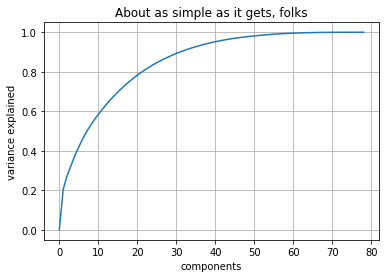

In [22]:
### PLOTTING # OF COMPONENTS BY VARIANCE EXPLAINED ###

# function that outputs 2D list? array?
def pca_script(n, x, df): # n = number of components, x features
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(x)
    a = []
    for i in range(1,n+1):
        a.append("PCA_"+str(n))
    principalDf = pd.DataFrame(data = principalComponents, columns = a)
    finalDf = pd.concat([principalDf, df.iloc[:, 0]], axis = 1)
    var_ratio = pca.explained_variance_ratio_
    components = pca.components_
    return var_ratio, components

def component_by_var(x, df):
    a = []
    b = []
    for i in range(len(df.columns)):
        var = pca_script(i,x,df)
        a.append(i)
        b.append(sum(var[0]))
    return a,b

comp = component_by_var(x, df)
x = comp[0]
y = comp[1]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='components', ylabel='variance explained',
       title='Variance explained by number of components')
ax.grid()

In [11]:
### ROI by Component Graph ###

def pca_graph(n, x, df): # n = number of components, x features
    if (n==2):
        pca = PCA(n)
        principalComponents = pca.fit_transform(x)
        a = []
        principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
        finalDf = pd.concat([principalDf, df.iloc[:, 0]], axis = 1)  
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('PC1', fontsize = 15)
        ax.set_ylabel('PC2', fontsize = 15)
        ax.set_title('2-Component PCA', fontsize = 20)
        for target in targets:
            indicesToKeep = df.iloc[:, 0].values  == target
            ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
                       , finalDf.loc[indicesToKeep, 'PC2'], s = 50)
        ax.grid()
        return pca.explained_variance_ratio_, pca.components_
    elif (n==3):
        pca = PCA(n)
        principalComponents = pca.fit_transform(x)
        a = []
        principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3'])
        finalDf = pd.concat([principalDf, df.iloc[:, 0]], axis = 1)  
        fig = plt.figure(figsize = (8,8))
        ax = Axes3D(fig)
        ax = fig.add_subplot(111,projection='3d') 
        ax.set_xlabel('PC1', fontsize = 15)
        ax.set_ylabel('PC2', fontsize = 15)
        ax.set_zlabel('PC3', fontsize = 15)
        ax.set_title('3-Component PCA', fontsize = 20)
        for target in targets:
            indicesToKeep = df.iloc[:, 0].values  == target
            ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2']
                       , finalDf.loc[indicesToKeep, 'PC3'])
               #, s = 50)
        ax.grid()
        return pca.explained_variance_ratio_, pca.components_
    else:
        return

[ 0.20523434  0.06895159  0.05147835]


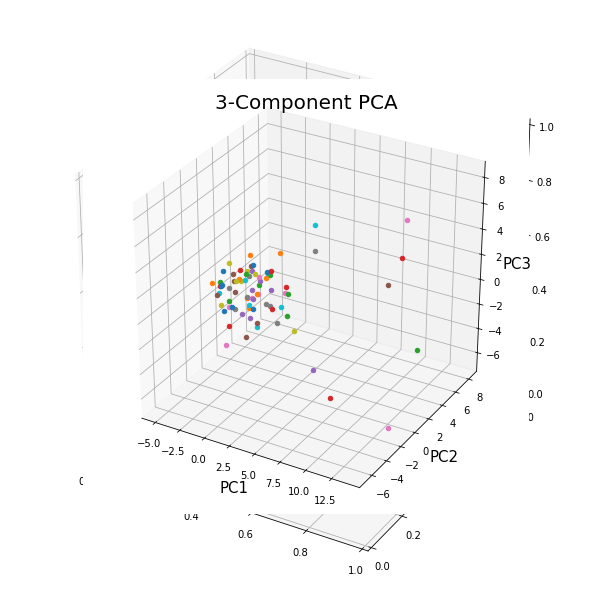

In [12]:
### Making a Graph ###
pca_run = pca_graph(3, x, df)
print(pca_run[0])
### Variance explained by each component ###
#print(a[0]) # pca.explained_variance_ratio_
    # OUTPUT: array([ 0.23354774,  0.11475039])

In [13]:
### FUNCTION to generate heat map of each PC explained by descriptors ###

def heat_map(ar, n, m):
    c = np.delete(ar,0,0)
    c = c.astype(np.float)
    plt.matshow(c,cmap='viridis',vmin=n,vmax=m)
    plt.yticks([0,1],['PC1','PC2'],fontsize=10)
    t = c.shape[1]
    
    plt.xticks(range(int(t)), ar[0])
    plt.xlabel("ROIs", fontsize = 15)
    plt.ylabel("Principal Components (PCs)", fontsize = 15)
    plt.colorbar()
    plt.show()

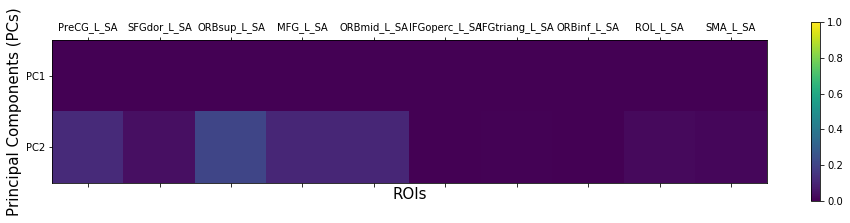

In [105]:
### Example: first 10 descriptors ###
# pca.components_ = a[1]
# b = np.asarray(pca.components_[0,0:10])
# c = np.asarray(pca.components_[1,0:10])
# d = np.asarray(pca.components_[1,0:10])
# a = df.columns[1:11]
# d = [a,b,c]
# heat_map(d, 0, 1)

In [106]:
### How much each feature contributes to each component
contrib = np.asarray(pca.components_)
contrib.shape

(2, 78)

In [107]:
##### Important Feature Extraction #####
    # Function: Thresholds & Displays the Data
    # c: array where rows = components, columns = descriptors, entries = contribution of descriptor to respective component
def data_threshold(c,n, min, max):
    threshold = n
    d = c[1,:].astype(float) + c[2,:].astype(float)
    d=d.reshape(1,c.shape[1])
    d = np.vstack((d, d, d))
    e=c[d > n]
    e=np.asarray(e)
    t = e.shape[0]

    # number of descriptors that respect the threshold
    t= t/3
    print(t)

    f=(e[0:int(t)])
    g=(e[int(t):int(2*t)])
    h=(e[int(2*t):int(3*t)])

        # creating array with only columns from c that respect threshold!
    final = np.vstack((f, g, h))
    ###print(final.shape)
    pd.DataFrame(final).to_csv("descript_"+str(n)+".csv")
    heat_map(final,min,max)

8.0


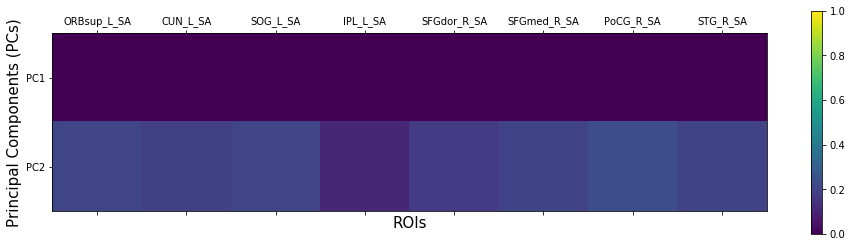

In [114]:
#### TEST: Thresholding & Displaying Data
comp_arr = np.asarray(pca.components_)
features = list(df.columns)
features.pop(0)
features
bb = []
bb.append(features)
bb.append(comp_arr[0])
bb.append(comp_arr[1])
cc = np.asarray(bb)
cc.shape
data_threshold(cc, 0.08,0,1)